## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [ ]:
# useful for getting number of output classes
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Cotton_disease_project/package/data_set/train'
valid_path = '/content/gdrive/MyDrive/Cotton_disease_project/package/data_set/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Cotton_disease_project/package/data_set/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Cotton_disease_project/package/data_set/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Cotton_disease_project/package/data_set/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
61/61 [==============================] - 820s 13s/step - loss: 3.2436 - accuracy: 0.6918 - val_loss: 0.0976 - val_accuracy: 0.9444
Epoch 2/15
61/61 [==============================] - 788s 13s/step - loss: 0.4193 - accuracy: 0.9310 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 3/15
61/61 [==============================] - 784s 13s/step - loss: 0.2425 - accuracy: 0.9504 - val_loss: 0.3182 - val_accuracy: 0.8889
Epoch 4/15
61/61 [==============================] - 786s 13s/step - loss: 0.4107 - accuracy: 0.9458 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 5/15
61/61 [==============================] - 782s 13s/step - loss: 0.2947 - accuracy: 0.9525 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 6/15
61/61 [==============================] - 798s 13s/step - loss: 0.2557 - accuracy: 0.9595 - val_loss: 0.0536 - val_accuracy: 0.9444
Epoch 7/15
61/61 [==============================] - 793s 13s/step - loss: 0.2489 - accuracy: 0.9718 - val_loss: 0.5149 - val_accuracy: 0.9444
Epoch 

In [ ]:
import matplotlib.pyplot as plt

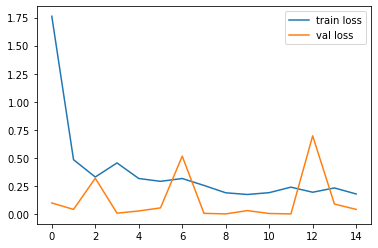

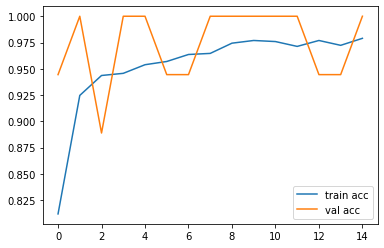

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.56167757e-38, 1.00000000e+00, 0.00000000e+00, 1.42818350e-38],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.64498999e-30],
       [1.00000000e+00, 0.00000000e+00, 4.05255402e-19, 1.17390865e-16],
       [0.00000000e+00, 8.14537785e-22, 0.00000000e+00, 1.00000000e+00],
       [1.26417553e-24, 0.00000000e+00, 1.00000000e+00, 8.04716349e-30],
       [0.00000000e+00, 1.00000000e+00, 2.96636470e-31, 2.84132445e-29],
       [1.00000000e+00, 4.38584354e-23, 0.00000000e+00, 3.50304446e-21],
       [6.52964349e-11, 5.88076023e-16, 9.99999881e-01, 8.98414072e-08],
       [1.99344881e-13, 1.00000000e+00, 5.87528851e-24, 6.10044784e-13],
       [4.46580906e-19, 9.03915044e-22, 1.08021085e-30, 1.00000000e+00],
       [5.34127471e-31, 7.15058704e-21, 2.47192679e-32, 1.00000000e+00],
       [2.60800418e-20, 2.72390956e-14, 3.44493064e-16, 1.00000000e+00],
       [1.43912570e-32, 0.00000000e+00, 1.00000000e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 1, 0, 3, 2, 1, 0, 2, 1, 3, 3, 3, 2, 2, 1, 2, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/Cotton_disease_project/package/model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Cotton_disease_project/package/data_set/test/fresh cotton leaf/d (341).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[ 85.,  76.,  71.],
        [ 91.,  82.,  77.],
        [ 91.,  82.,  77.],
        ...,
        [ 60.,  56.,  45.],
        [ 62.,  57.,  51.],
        [ 66.,  61.,  55.]],

       [[ 99.,  90.,  85.],
        [112., 103.,  98.],
        [106.,  97.,  88.],
        ...,
        [ 66.,  57.,  52.],
        [ 66.,  61.,  55.],
        [ 65.,  60.,  54.]],

       [[119., 110., 101.],
        [105.,  96.,  91.],
        [142., 133., 124.],
        ...,
        [ 80.,  71.,  66.],
        [ 81.,  72.,  67.],
        [ 58.,  53.,  47.]],

       ...,

       [[176., 226., 153.],
        [171., 221., 148.],
        [173., 223., 150.],
        ...,
        [137., 185., 127.],
        [137., 185., 125.],
        [141., 189., 129.]],

       [[175., 225., 152.],
        [176., 226., 153.],
        [176., 226., 155.],
        ...,
        [133., 181., 123.],
        [132., 180., 120.],
        [138., 186., 126.]],

       [[173., 223., 150.],
        [167., 217., 146.],
        [175., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.12574911, 0.05799514, 0.8030038 , 0.01325199]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'